In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KernelDensity

Q-1: What is the probability distribution of age in the insurance dataset?
-- Find out using the KDE method

In [116]:
df=pd.read_csv("insurance_data - insurance_data (1).csv")

In [6]:
df.duplicated().sum()

0

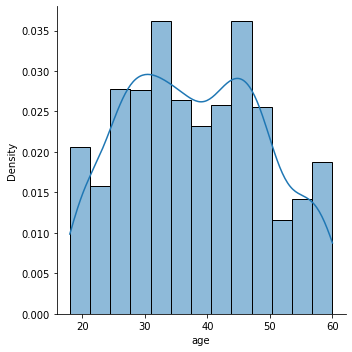

In [48]:
sns.displot(df.age,kde=True,kind='hist',stat='density')

In [16]:
age=df.age[~df.age.isnull()]

In [44]:
kde=KernelDensity(kernel='gaussian',bandwidth=3)
kde.fit(age[:,None])

C:\Users\Deepak\AppData\Local\Temp\ipykernel_32624\2804272702.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde.fit(age[:,None])


KernelDensity(bandwidth=3)

In [45]:
x=np.linspace(min(age),max(age),100).reshape(-1,1)
log_pdf=kde.score_samples(x)
pdf=np.exp(log_pdf)


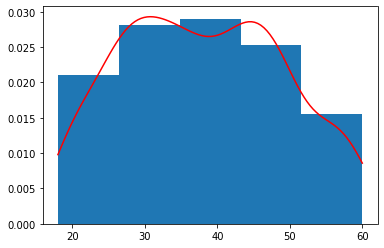

In [50]:
plt.hist(age,bins=5,density=True)
plt.plot(x,pdf,color='red')

 # What is the probability of a patient having a BMI greater than 30?

In [52]:
df.bmi.isnull().sum()

0

In [76]:
kde=KernelDensity(kernel='gaussian',bandwidth=4)
kde.fit(df.bmi[:,None])

C:\Users\Deepak\AppData\Local\Temp\ipykernel_32624\1806950593.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde.fit(df.bmi[:,None])


KernelDensity(bandwidth=4)

In [215]:
x=np.linspace(np.min(df.bmi),np.max(df.bmi),100)
pdf=np.exp(kde.score_samples(x[:,None]))

In [230]:
pdf

array([9.76172875e-16, 9.77354123e-16, 9.78536767e-16, 9.79720809e-16,
       9.80906250e-16, 9.82093091e-16, 9.83281335e-16, 9.84470983e-16,
       9.85662036e-16, 9.86854496e-16, 9.88048366e-16, 9.89243645e-16,
       9.90440337e-16, 9.91638443e-16, 9.92837963e-16, 9.94038901e-16,
       9.95241258e-16, 9.96445034e-16, 9.97650233e-16, 9.98856855e-16,
       1.00006490e-15, 1.00127438e-15, 1.00248528e-15, 1.00369761e-15,
       1.00491137e-15, 1.00612657e-15, 1.00734320e-15, 1.00856127e-15,
       1.00978078e-15, 1.01100173e-15, 1.01222412e-15, 1.01344795e-15,
       1.01467322e-15, 1.01589995e-15, 1.01712812e-15, 1.01835774e-15,
       1.01958882e-15, 1.02082134e-15, 1.02205532e-15, 1.02329076e-15,
       1.02452766e-15, 1.02576602e-15, 1.02700583e-15, 1.02824712e-15,
       1.02948986e-15, 1.03073408e-15, 1.03197976e-15, 1.03322691e-15,
       1.03447553e-15, 1.03572563e-15, 1.03697720e-15, 1.03823025e-15,
       1.03948478e-15, 1.04074079e-15, 1.04199828e-15, 1.04325725e-15,
      

In [231]:
cdf = np.cumsum(pdf)

# Normalize the CDF
cdf /= cdf[-1]

In [233]:
prob_above_30 = 1 - np.interp(30, x, cdf)

In [234]:
prob_above_30

0.6306217438799184

Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

In [184]:
smoker=df[df.smoker=='Yes'].claim
smoker_no=df[df.smoker=='No'].claim

In [185]:
kde=KernelDensity(kernel='gaussian',bandwidth=2000)
kde.fit(smoker[:,None])
kde1=KernelDensity(kernel='gaussian',bandwidth=2000)
kde1.fit(smoker_no[:,None])

C:\Users\Deepak\AppData\Local\Temp\ipykernel_32624\1211636568.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde.fit(smoker[:,None])
C:\Users\Deepak\AppData\Local\Temp\ipykernel_32624\1211636568.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde1.fit(smoker_no[:,None])


KernelDensity(bandwidth=2000)

In [191]:
x=np.linspace(min(smoker),max(smoker),1000)
log_pdf=kde.score_samples(x[:,None])
pdf=np.exp(log_pdf)
x1=np.linspace(min(smoker_no),max(smoker_no),1000)
log_pdf1=kde1.score_samples(x1[:,None])
pdf1=np.exp(log_pdf1)

C:\Users\Deepak\AppData\Local\Temp\ipykernel_32624\3684369230.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


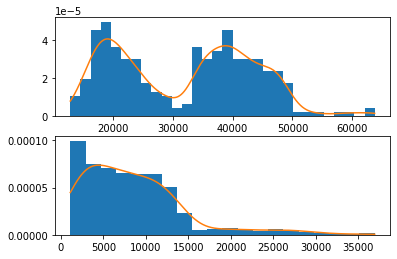

In [192]:
fig,ax=plt.subplots(ncols=1,nrows=2)
ax[0].hist(smoker,density=True,bins=30)
ax[0].plot(x,pdf)
ax[1].hist(smoker_no,density=True,bins=20)
ax[1].plot(x1,pdf1)
fig.show()

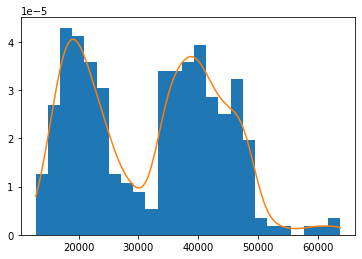

In [182]:
plt.hist(smoker,density=True,bins=25)
plt.plot(x,pdf)

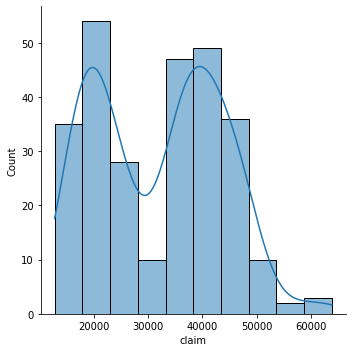

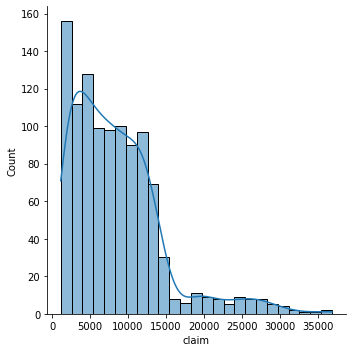

In [198]:
sns.displot(smoker,kind='hist',kde=True)
sns.displot(smoker_no,kind='hist',kde=True)

-- ploting with seaborn

Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

<AxesSubplot: xlabel='age', ylabel='claim'>

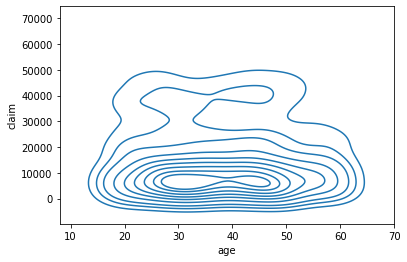

In [200]:
sns.kdeplot(x=df.age,y=df.claim)